<a href="https://colab.research.google.com/github/ColinCMach/LearningPytorch/blob/main/TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision

print(torch.__version__)
print(torchvision.__version__)

1.12.1+cu113
0.13.1+cu113


In [ ]:
try:
  import torch
  import torchvision
  assert int(torch.__version__).split(".")[1] >= 12, " torch verision should be 1.12+"
  assert int(torchvision.__version__).split(".")[1] >= 13, "torchvision should be greater than 0,13+"
  print(f"torch verision is {torch.__version__}")
  print(f" Torchvision version is {torchvision.__version__}")

except:
  print(f"[INFO] tor ch vision versions aare anot as required installing the nighly verisions")
  !pip3 install -U --pre torch torchvision --extra-index-url https://download.pytorch.org/whl/nightly/cu113
  import torch
  import torchvision
  print(f" the torch version is {torch.__version__}")
  print(f" The torchvision version is {torchvision.__version__}")

[INFO] tor ch vision versions aare anot as required installing the nighly verisions
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/nightly/cu113
     |██████████████████████████████  | 834.1 MB 1.2 MB/s eta 0:00:46tcmalloc: large alloc 1147494400 bytes == 0x65d6c000 @  0x7fb029e2e615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |████████████████████████████████| 890.2 MB 6.3 kB/s 
     |████████████████████████████████| 24.3 MB 79.8 MB/s 
     |████████████████████████████████| 21.0 MB 1.4 MB/s 
     |████████████████████████████████| 317.1 MB 24 kB/s 
     |████████████████████████████████| 557.1 MB 10 kB/s 
     |████████████████████████████████| 849 kB 43.1 MB/s 
  Attempt

 the torch version is 1.12.1+cu113
 The torchvision version is 0.13.1+cu113


# Importhe code from last secotion so we do not have to write it again

In [ ]:
# continue with regualr imports
import matplotlib.pyplot as plt
import torchvision
import torch

from torch import nn
from torchvision import transforms

# Try to get torch info installi fit does not work
try:
  from torchinfo import summary
except:
  print("[INFOR] could not find torch info... so installing it now")
  !pip install -q torchinfo
  from torchinfo import summary

# import the going_modular directory , download it from github if do not have it already
try:
  from going_modular.going_modular import data_setup, engine
except:
  # Get the goiung_modular scripts
  print("[INFO] coult not find the going_modular scripts so downloading the files from GitHub")
  !git clone https://github.com/mrdbourke/pytorch-deep-learning
  !mv pytorch-deep-learning/going_modular .
  !rm -rf pytorch-deep-learning
  from going_modular.going_modular import data_setup , engine

[INFOR] could not find torch info... so installing it now
[INFO] coult not find the going_modular scripts so downloading the files from GitHub
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 3283, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (147/147), done.
remote: Total 3283 (delta 131), reused 223 (delta 109), pack-reused 3020
Receiving objects: 100% (3283/3283), 645.39 MiB | 35.24 MiB/s, done.
Resolving deltas: 100% (1861/1861), done.
Checking out files: 100% (221/221), done.


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
from IPython.utils.text import Path
# The the data
import os
import zipfile

from pathlib import Path

import requests

data_path = Path("data/")
image_path = data_path / "pizzza_steak_sushi"

if image_path.is_dir():
  print("This ismage path already exists skipping making it")
else:
  image_path.mkdir(parents = True, exist_ok = True)

# download the pizza and steak and sushi data
with open(data_path/ "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Unzipping pizza, steak, and suhsi data...")
  f.write(request.content)

#unzip the pizza,steak and sushi data
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip" , "r") as zip_ref:
  print("Unzipping the datafile")
  zip_ref.extractall(image_path)
os.remove("/content/data/pizza_steak_sushi.zip")

Unzipping pizza, steak, and suhsi data...
Unzipping the datafile


In [ ]:
train_dir = image_path / "train"
test_dir = image_path/ "test"

train_dir , test_dir

(PosixPath('data/pizzza_steak_sushi/train'),
 PosixPath('data/pizzza_steak_sushi/test'))

### Manual creation for dataloaders

In [ ]:
from torchvision import transforms

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
manual_transforms = transforms.Compose([transforms.Resize(size = (224,224)), transforms.ToTensor(), normalize])

from going_modular.going_modular import data_setup 

train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir = train_dir, test_dir = test_dir, transform = manual_transforms, batch_size = 32)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7f2dc28c5ad0>,
 ['pizza', 'steak', 'sushi'])

### Transfoirms auto creation


In [ ]:
import torchvision
torchvision.__version__

'0.13.1+cu113'

In [ ]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # Default is the best available weights !
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [ ]:
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [ ]:
train_dataloader , test_dataloader, class_names = data_setup.create_dataloaders(train_dir = train_dir, test_dir = test_dir, transform = auto_transforms, batch_size = 32)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7f2dc28e0510>,
 ['pizza', 'steak', 'sushi'])

### Next we have to get the pretrained model
1. pytorch domain libraries 
2. Libraries like timm(torch image models)
3. Hugging face libraries

We should be experieenting with different models when trying to solve a pr oblem 
Some things to consider include:
1. speed
2. Size= how big is the model
3. performance- how well does the problem get solved


### setting up the pretrained model 

In [ ]:
# hew method of setting up a pretrained mode
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
model = torchvision.models.efficientnet_b0(weights = weights).to(device)
model

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-3dd342df.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-3dd342df.pth


  0%|          | 0.00/20.5M [00:00<?, ?B/s]

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
from torchinfo import summary

summary(model = model, input_size = (1, 3, 224, 224), col_names = ["input_size", "output_size", "num_params", "trainable"], col_width = 20, row_settings = ["var_names"]) # example of [batch_size, color_channels, height, width]


Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 1000]            --                   True
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1280, 7, 7]      --                   True
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   True
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    864                  True
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    64                   True
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 16, 112,

### next we are going to need to freeze the model parameters to suit our needs

In [ ]:
# freeze all of te base models layers in EffNetb0
for param in model.features.parameters():

  param.requires_grad = False

In [ ]:
len(class_names)

3

In [ ]:
from torch import nn
model.classifier =nn.Sequential(
    nn.Dropout(p = 0.2, inplace = True),
    nn.Linear(in_features = 1280, 
    out_features = len(class_names))).to(device)

In [ ]:
model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=3, bias=True)
)

In [ ]:
summary(model = model, input_size = (1,3,224,224),col_names = ["input_size","output_size", "num_params", "trainable"], col_width = 20, row_settings = ["var_names"] )

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 3]               --                   Partial
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1280, 7, 7]      --                   False
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   False
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    (864)                False
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    (64)                 False
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 1

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr = 0.001)

In [ ]:
# import the train function
from going_modular.going_modular import engine

from timeit import default_timer as timer

# set up the training and save th model results
start_time = timer()
results = engine.train(model = model, train_dataloader = train_dataloader, test_dataloader = test_dataloader, optimizer = optimizer , loss_fn = loss_fn, epochs = 5, device = device)
end_time = timer()

print(f"the total amount of time to train was {end_time-start_time} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0380 | train_acc: 0.4688 | test_loss: 0.8768 | test_acc: 0.7330
Epoch: 2 | train_loss: 0.8896 | train_acc: 0.6758 | test_loss: 0.7375 | test_acc: 0.8542
Epoch: 3 | train_loss: 0.7497 | train_acc: 0.8438 | test_loss: 0.7148 | test_acc: 0.8759
Epoch: 4 | train_loss: 0.6929 | train_acc: 0.7734 | test_loss: 0.6371 | test_acc: 0.8352
Epoch: 5 | train_loss: 0.5799 | train_acc: 0.9180 | test_loss: 0.6295 | test_acc: 0.9072
the total amount of time to train was 161.53086448600004 seconds


[INFO] Couldn't find helper_functions.py, downloading...


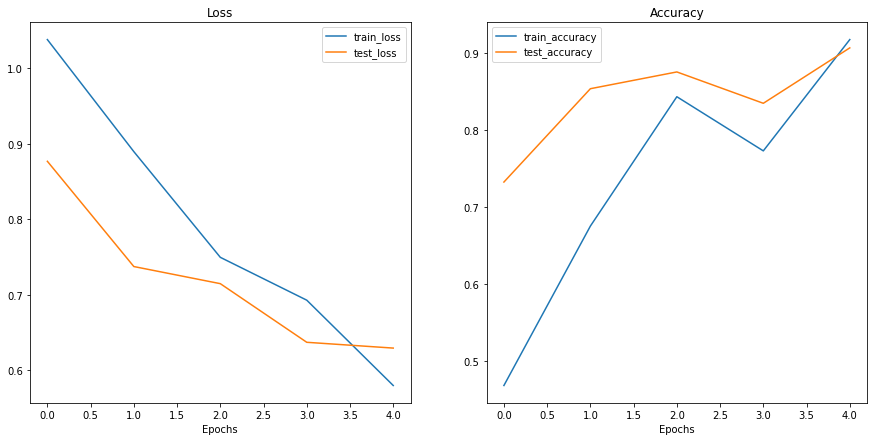

In [ ]:
try:
  from helper_functions import plot_loss_curves
except:
  print(f"[INFO] Couldn't find helper_functions.py, downloading...")
  with open("helper_functions.py", "wb") as f:
    import requests
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/helper_functions.py")
    f.write(request.content)
  from helper_functions import plot_loss_curves

# Plot the loss curves of our model
plot_loss_curves(results)

### n ext lets create a function that plots and predicts on the images from the test data set 
Things we need to make sure our data is
1. Same shape
2. Same datatype
3. Samde device
4. Same transform

Our fucntion we will create will go the following
1. Take the trainedmodel with flass names and an image size and a transform and target device
2. Open with the PIL.image,Open()
3. create a transform if one doesn;t exist
4. make sure the model is on the target device
4. Turn on model.eval() mode to make sure things like nn.Dropout() is turned off so it wil be ready for inference 
6. transforms the target images and make sure the dimensionality is suited for the model( this mainly relates to batch size
7. Make predictions on the image by passing it thorugh the mode 9( it will return logits)
8. Convert the model's output logits with probabilitys by using the torch.softmax
9. Convert the model prediction probabilites into labels by using the torch.argmax()
10. Finally plot the images with matplot lib 

In [ ]:
import torch
x = torch.rand([2, 4], dtype=torch.float32)
print(x.shape)
print(x)
x = x.unsqueeze(dim = 1)
print(x.shape)
print(x)

x = x.unsqueeze(dim = 0)
print(x.shape)
print(x)

torch.Size([2, 4])
tensor([[0.7720, 0.2606, 0.3383, 0.7610],
        [0.4310, 0.7516, 0.9941, 0.0956]])
torch.Size([2, 1, 4])
tensor([[[0.7720, 0.2606, 0.3383, 0.7610]],

        [[0.4310, 0.7516, 0.9941, 0.0956]]])
torch.Size([1, 2, 1, 4])
tensor([[[[0.7720, 0.2606, 0.3383, 0.7610]],

         [[0.4310, 0.7516, 0.9941, 0.0956]]]])


## VERY IMPORTANT DO NOT FORGET 
- Dim =0 means that the sum of each colums = 1
- Dim= 1 means that sthe sum of each row = 1

In [ ]:
from typing import List, Tuple

from PIL import Image 

from torchvision import transforms
# 1. take in a trained mode]

def pred_and_plot_image(model:model,
                  image_path:str,
                  class_names:List[str],
                  image_size:Tuple[int,int] = (224,224),
                  transform :torchvision.transforms = None,
                  device:torch.device = device):
  # 2. open the imaage with PIL
  img = Image.open(image_path)

  if transform is not None:
    image_transform = transform
  else:
    image_transform = transforms.Compose([transforms.Resize(image_size), 
                                          transforms.ToTensor(), 
                                          transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                               std=[0.229, 0.224, 0.225])
    ])

  model.to(device)

  # turn on the inference mode
  model.eval()
  with torch.inference_mode():
    #6. the iamge and add an extra batch dimension
    transformed_image = image_transform(img).unsqueeze(dim = 0) # batch_size , color_channels, height, width

    # 7. amke a prediction of the image by apssing it through the model
    target_image_pred = model(transformed_image.to(device))

  #8. Convert the models prection intor probabilites
  target_image_pred_probs = target_image_pred.softmax(dim = 1)

  target_image_pred_label = target_image_pred_probs.argmax(dim = 1)

  # plot the image 
  plt.figure()
  plt.imshow(img)
  plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")
  plt.axis(False);

[PosixPath('data/pizzza_steak_sushi/test/steak/354513.jpg'), PosixPath('data/pizzza_steak_sushi/test/steak/296375.jpg'), PosixPath('data/pizzza_steak_sushi/test/steak/894825.jpg'), PosixPath('data/pizzza_steak_sushi/test/steak/1868005.jpg'), PosixPath('data/pizzza_steak_sushi/test/steak/1016217.jpg'), PosixPath('data/pizzza_steak_sushi/test/steak/966174.jpg'), PosixPath('data/pizzza_steak_sushi/test/steak/100274.jpg'), PosixPath('data/pizzza_steak_sushi/test/steak/3424937.jpg'), PosixPath('data/pizzza_steak_sushi/test/steak/1627703.jpg'), PosixPath('data/pizzza_steak_sushi/test/steak/2144308.jpg'), PosixPath('data/pizzza_steak_sushi/test/steak/690177.jpg'), PosixPath('data/pizzza_steak_sushi/test/steak/2117351.jpg'), PosixPath('data/pizzza_steak_sushi/test/steak/502076.jpg'), PosixPath('data/pizzza_steak_sushi/test/steak/1882831.jpg'), PosixPath('data/pizzza_steak_sushi/test/steak/1302563.jpg'), PosixPath('data/pizzza_steak_sushi/test/steak/673127.jpg'), PosixPath('data/pizzza_steak_su

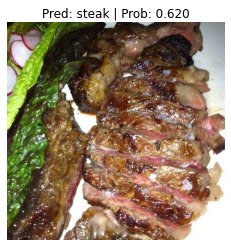

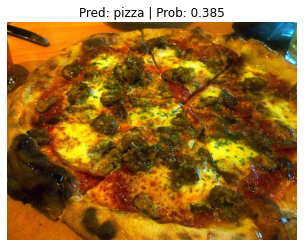

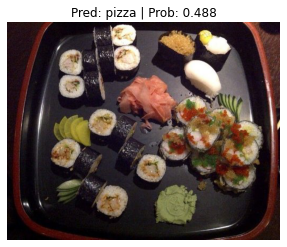

In [ ]:
# Get a random list of image paths from the test set
import random
num_images_to_plot = 3
test_image_path_list = list(Path(test_dir).glob("*/*.jpg"))
print(test_image_path_list)
test_image_path_sample = random.sample(population=test_image_path_list,
                                       k=num_images_to_plot)

# Make predictions on and plot the images
for image_path in test_image_path_sample:
  pred_and_plot_image(model=model,
                      image_path=image_path,
                      class_names=class_names,
                      image_size=(224, 224))



### Lets make predications on a custom image


In [ ]:
# download the image
import requests

# setup the custom image path
custom_image_path = data_path/"04-pizza-dad.jpeg"

# download the image if it does not exists
if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    # download the imnage from girbuh
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/04-pizza-dad.jpeg")
    print(f" Download {custom_image_path}")
    f.write(request.content)
else:
  pritn(f"{custom_image_path} already exists skipping the download...")
  

In [ ]:
pred_and_plot_image(model = model, image_path= custom)